In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# quantiles and stdev - cont data

In [6]:
df.dtypes[df.dtypes!='object'].index.tolist()

['age', 'bmi', 'children', 'charges']

In [8]:
cont_cols = ['age', 'bmi', 'charges']
cont_cols

['age', 'bmi', 'charges']

In [9]:
cat_cols = df.select_dtypes('object').columns.tolist() + ['children']
cat_cols

['sex', 'smoker', 'region', 'children']

In [ ]:
# measures of variation

In [23]:
df['age'].std(ddof = 1)

14.049960379216172

In [24]:
np.std(df['age'])

14.04470903895454

In [18]:
print('Column: pop stdev, sample stdev')
print('----')

for i in cont_cols:
    
    std_pop = round(np.std(df[i]),2)
    std_sample = round(df[i].std(ddof = 1),2)
    
    print(i, ':' , std_pop, ',', std_sample)

Column: pop stdev, sample stdev
----
age : 14.04 , 14.05
bmi : 6.1 , 6.1
charges : 12105.48 , 12110.01


In [ ]:
## measures of location

In [27]:
np.percentile(df['bmi'],99)

46.40789999999996

In [28]:
cont_cols

['age', 'bmi', 'charges']

In [29]:
print('Column: Q1, Q2, Q3')
print('----')

for i in cont_cols:
    
    q1 = round(np.percentile(df[i], 25), 2)
    q2 = round(np.percentile(df[i], 50), 2) #median
    q3 = round(np.percentile(df[i], 75), 2)
    
    print(i, ':' , q1, ',', q2, ',', q3)

Column: Q1, Q2, Q3
----
age : 27.0 , 39.0 , 51.0
bmi : 26.3 , 30.4 , 34.69
charges : 4740.29 , 9382.03 , 16639.91


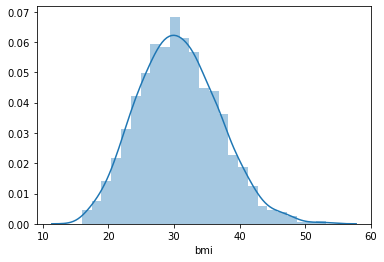

In [35]:
sns.distplot(df['bmi'])

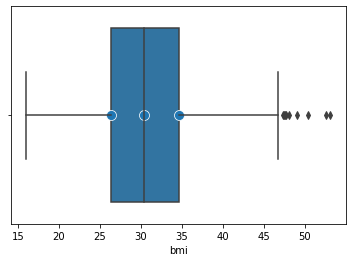

In [34]:
sns.boxplot(df['bmi'])
sns.scatterplot([np.percentile(df['bmi'], 25), np.percentile(df['bmi'], 50), np.percentile(df['bmi'], 75)], [0,0,0], s = 100)

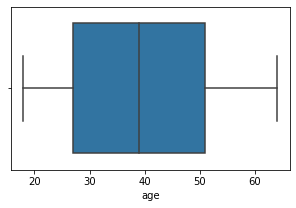

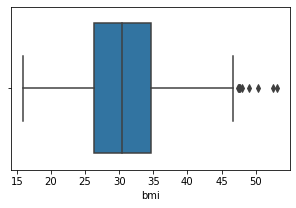

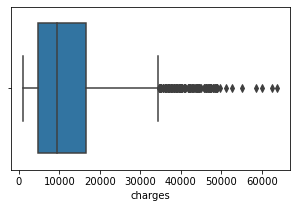

In [39]:
for i in cont_cols:
    plt.figure(figsize = (5,3))
    sns.boxplot(df[i])
    plt.show()

In [41]:
# custom function for easy and efficient analysis of numerical univariate

def desc_stat_cont(data, cols):
    '''
    This takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''
    
    size = len(cols)
    if size == 4:
        c = 2
    else:
        c = 3
        
    r = size/c
        
    if size%c == 0:
        r = int(r)
    else:
        r = int(r)+1

    plt.rcParams['figure.figsize'] = [20, 5*r]
        
    count = 1
    #looping for each variable
    for i in cols:

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        coef_var = st_dev/mean*100

        # calculating mu +- 1*sigma 
        m1s = mean-st_dev, mean+st_dev
        
        # rounding off
        mean = round(mean,2)
        median = round(median,2)
        mini = round(mini,2) 
        maxi = round(maxi,2)
        ran = round(ran,2)
        st_dev = round(st_dev,2)
        m1s = [round(i) for i in m1s]
        coef_var = round(coef_var,2)
        
        q1 = round(np.percentile(data[i], 25), 2)
        q2 = round(np.percentile(data[i], 50), 2)
        q3 = round(np.percentile(data[i], 75), 2)

        #Plotting the variable with every information
        plt.subplot(r,c,count)
        
        sns.kdeplot(data[i], shade=True) # you can use distplot also
        sns.scatterplot([mean], [0], color = 'red', label = "mean", s=100)
        sns.scatterplot([median], [0], color = 'blue', label = "median/Q2", s = 50)
        sns.lineplot(m1s, [0,0], color = 'black', label = "m+-1s") # for drawing line
        sns.scatterplot([q1,q3], [0,0], color = 'green', label = "Q1,Q3", s = 40)
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s = 100) # for plotting dot

        plt.xlabel('{}'.format(i), fontsize = 15)
        plt.ylabel('density',fontsize = 15)
        
        titl = 'mean = {}; median = {}; std_dev = {}; \nmu+-sigma = {}; coef_var = {}%,\nmin = {}; max = {}; range = {};\nQ1,Q2,Q3 = {}'
        plt.title(titl.format(mean, median,st_dev,(m1s[0],m1s[1]), coef_var,  mini,  maxi,  ran, (q1,q2,q3)), fontsize = 14)
                  
        plt.legend(loc='upper right', fontsize = 13)
        
        count += 1

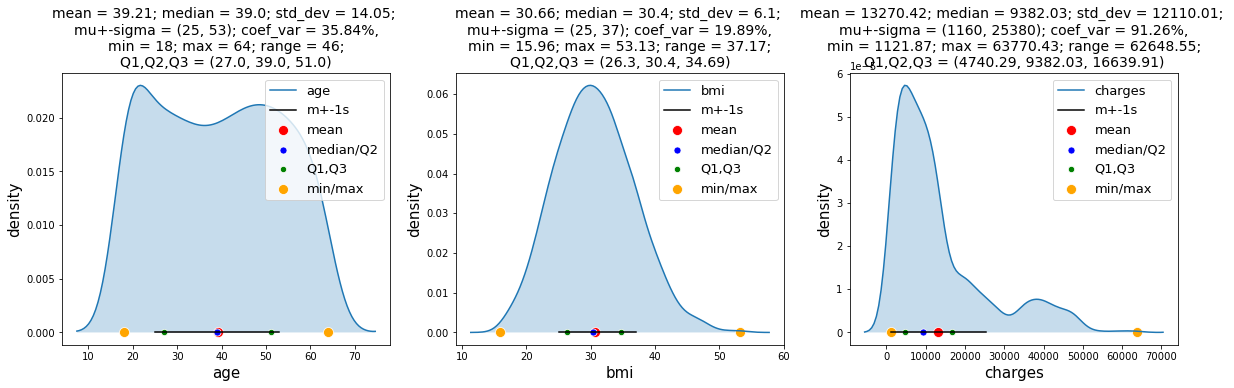

In [43]:
desc_stat_cont(df, cont_cols)

In [44]:
cat_cols

['sex', 'smoker', 'region', 'children']

In [57]:
# Custom function for univariate visualization of Categorical Variables

def desc_stat_cat(data, cols):

    '''
    This takes a group of variables (categorical) and plot/print all the value_counts and countplot.
    '''
    size = len(cols)
        
    if size == 4:
        c = 2
    else:
        c = 3

    r = size/c

    if size%c == 0:
        r = int(r)
    else:
        r = int(r)+1

    plt.rcParams["figure.figsize"] = [20, 6*r]

    count = 1
    for i in cols:
        norm_count = data[i].value_counts(normalize = True).round(2)
#         norm_count = str(norm_count).split('Name')[0] # to remove the bottom line of series value_counts()
        nu = data[i].nunique()
        
        plt.subplot(r,c,count)
        plt.subplots_adjust(hspace = 1) # hspace (height); wspace (width)

        sns.countplot(data[i])

        plt.ylabel('proportion', fontsize = 15)
        plt.xlabel('{}'.format(i), fontsize = 15)
        plt.title('n_uniques = {} \n proportion: \n {};'.format(nu,norm_count))

        count += 1

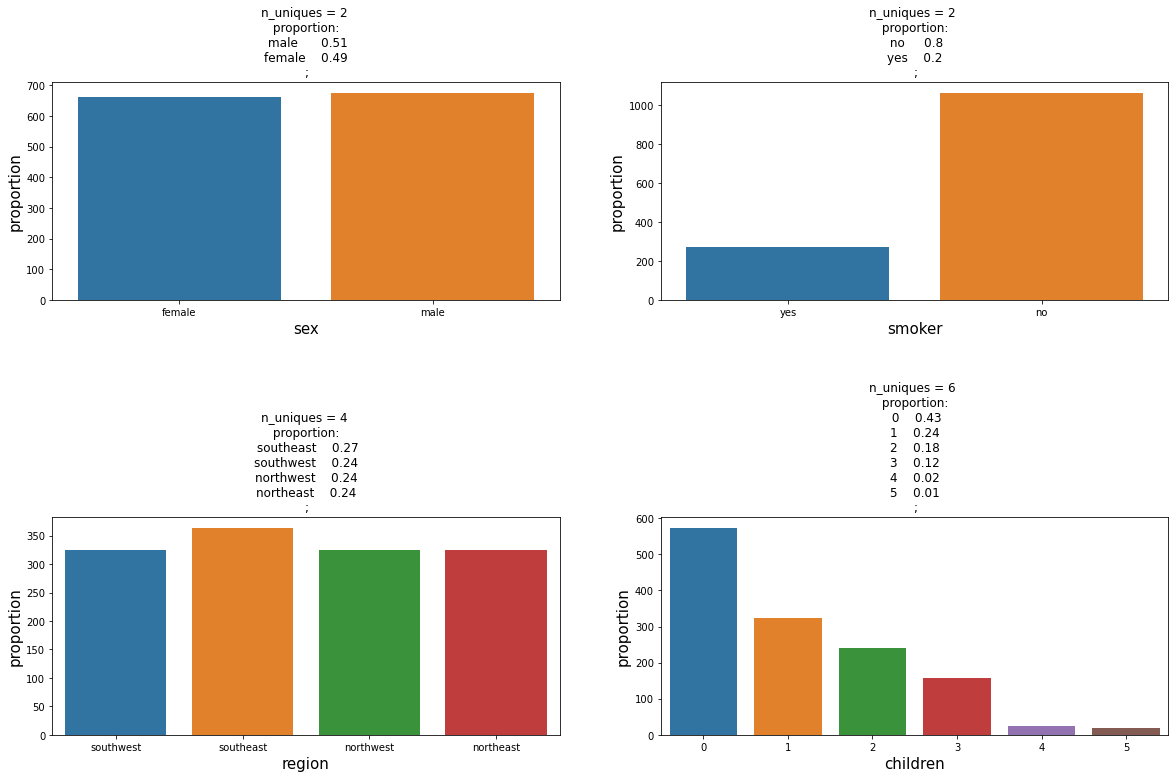

In [58]:
desc_stat_cat(df, cat_cols)